# Semeion Hand Written Digit Classification

The semeion hand written digit is a dataset from the UCI Machine Learning Repository.

It consists of 1593 handwritten digits from around 80 persons were scanned, stretched in a rectangular box 16x16 in a gray scale of 256 values.

Our task is to build a Convnet model to classify the digits!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
np.random.seed(3568) # fix the numpy random seed to allow reproducible result
tf.set_random_seed(724) # fix the tensorflow random seed to allow reproducible result

In [3]:
data = pd.read_csv('semeion.data', header=None, delimiter=' ')

In [4]:
data.head() # first 256 columns represent 16x16 digits, 
# the 257 to 266 columns are multi-class representation of the digit, i.e. from 0 to 9)

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN


In [5]:
data.shape

(1593, 267)

In [6]:
a = data.iloc[1:2,:]

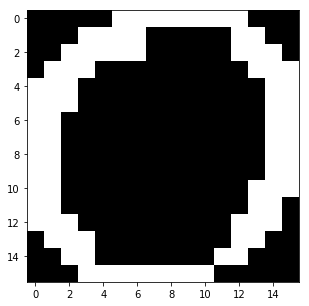

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(np.array(a.iloc[:,:256]).reshape((16,16)), cmap='gray')

In [8]:
a.iloc[:,-11:]

,256,257,258,259,260,261,262,263,264,265,266
1,1,0,0,0,0,0,0,0,0,0,NaN


In [9]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [10]:
Y = data.iloc[:,-11:-1]
X = data.iloc[:,:256]

In [11]:
X.shape

(1593, 256)

In [12]:
Y.shape

(1593, 10)

In [13]:
train_X, test_X, train_y, test_y = train_test_split(np.array(X).reshape((1593,16,16,-1)),\
                                                    np.array(Y).reshape((1593,10)) ,test_size = 0.3, random_state=555,\
                                                   stratify=np.array(Y).reshape((1593,10)))

In [14]:
train_X.shape

(1115, 16, 16, 1)

In [15]:
train_y.shape

(1115, 10)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [17]:
model = Sequential()
model.add(Conv2D(16, 5, 3, input_shape=(16, 16, 1), border_mode='same', activation='relu'))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu' ))
model.add(Dropout(0.25))
#model.add(Dense(512, activation='relu' ))
#model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy']) #Nadam is a more stable optimizer
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 16)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

/Users/jsnceo/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 3), input_shape=(16, 16, 1..., activation="relu", padding="same")`
  
/Users/jsnceo/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  """


In [18]:
test_X.shape

(478, 16, 16, 1)

In [19]:
test_y.shape

(478, 10)

In [20]:
history = model.fit(train_X, train_y, epochs=20, batch_size=128, validation_split=0.4, shuffle=False) # with cross validation

Train on 669 samples, validate on 446 samples
Epoch 1/20
669/669 [==============================] - 0s 422us/step - loss: 2.1692 - acc: 0.2646 - val_loss: 1.9470 - val_acc: 0.3677
Epoch 2/20
669/669 [==============================] - 0s 257us/step - loss: 1.5556 - acc: 0.5291 - val_loss: 1.3957 - val_acc: 0.5336
Epoch 3/20
669/669 [==============================] - 0s 265us/step - loss: 0.9068 - acc: 0.7444 - val_loss: 1.3185 - val_acc: 0.5830
Epoch 4/20
669/669 [==============================] - 0s 270us/step - loss: 0.7028 - acc: 0.7907 - val_loss: 0.5313 - val_acc: 0.8453
Epoch 5/20
669/669 [==============================] - 0s 306us/step - loss: 0.4169 - acc: 0.8685 - val_loss: 0.3958 - val_acc: 0.8857
Epoch 6/20
669/669 [==============================] - 0s 266us/step - loss: 0.2702 - acc: 0.9208 - val_loss: 0.3777 - val_acc: 0.8857
Epoch 7/20
669/669 [==============================] - 0s 272us/step - loss: 0.2219 - acc: 0.9223 - val_loss: 0.2560 - val_acc: 0.9238
Epoch 8/20
669/6

In [21]:
model.evaluate(test_X, test_y, verbose=1) # evalute test accuracy

478/478 [==============================] - 0s 119us/step


[0.13315712583395478, 0.95606694560669458]

In [22]:
model.save_weights('semeion_cnn_weight.h5') # save the model weightings only # use model.load_weights to restore it

In [23]:
model.save('semeion_cnn.h5') # save the entire model inclulding the architecture

### Results

We reached a 95.61% accurcay. It is believed that the bottleneck for CNN in this case is around 98%.

Surely there are rooms for improvements if we tune the architecture properly.